In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob


In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  1


In [5]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Clases:
- 0 : Normal.
- 1 : Falla en la pista interna.
- 2 : Falla pista externa.
- 3 : Falla en bola rodamiento.
- 4 : Falla combinada.

In [6]:
#Crear una función que divida en datos de entrenamiento y test las imagenes.

## Lectura de imágenes como arrays y creación de targets en base a etiquetas.

In [3]:
def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'H':
            y.append(0)
        if name[0] == 'I':
            y.append(1)
        if name[0] == 'O':
            y.append(2)
        if name[0] == 'B':
            y.append(3)
        if name[0] == 'C':
            y.append(4)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 5)
    y_val = keras.utils.to_categorical(y_val, 5)
    y_test = keras.utils.to_categorical(y_test, 5)

    return x_train, x_test, x_val, y_train, y_test, y_val

In [88]:
#Directorios de bancos de imagenes

mydir_1 = r"BANCOS/grey/16384/1seg/Banco_GLOBAL_COLOR"
mydir_2 = r"BANCOS/grey/16384/1seg/Banco_LOCAL_COLOR" 
mydir_3 = r"BANCOS/grey/16384/1seg/Banco_SENAL_COLOR" 

mydir_4 = r"BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR"
mydir_5 = r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 
mydir_6 = r"BANCOS/grey/16384/10giros/Banco_SENAL_COLOR" 

mydir_7 = r"BANCOS/grey/16384/0,6seg/Banco_GLOBAL_COLOR"
mydir_8 = r"BANCOS/grey/16384/0,6seg/Banco_LOCAL_COLOR" 
mydir_9 = r"BANCOS/grey/16384/0,6seg/Banco_SENAL_COLOR" 

test_size = 0.2
val_size = 0.1

In [89]:
x_train_1.shape

(424, 128, 128, 1)

In [90]:
#Datos
x_train_1, x_test_1, x_val_1, y_train_1, y_test_1, y_val_1 = prepros_bancoimagenes(mydir_1, test_size, val_size)
x_train_2, x_test_2, x_val_2, y_train_2, y_test_2, y_val_2 = prepros_bancoimagenes(mydir_2, test_size, val_size)
x_train_3, x_test_3, x_val_3, y_train_3, y_test_3, y_val_3 = prepros_bancoimagenes(mydir_3, test_size, val_size)

x_train_4, x_test_4, x_val_4, y_train_4, y_test_4, y_val_4 = prepros_bancoimagenes(mydir_4, test_size, val_size)
x_train_5, x_test_5, x_val_5, y_train_5, y_test_5, y_val_5 = prepros_bancoimagenes(mydir_5, test_size, val_size)
x_train_6, x_test_6, x_val_6, y_train_6, y_test_6, y_val_6 = prepros_bancoimagenes(mydir_6, test_size, val_size)

x_train_7, x_test_7, x_val_7, y_train_7, y_test_7, y_val_7 = prepros_bancoimagenes(mydir_7, test_size, val_size)
x_train_8, x_test_8, x_val_8, y_train_8, y_test_8, y_val_8 = prepros_bancoimagenes(mydir_8, test_size, val_size)
x_train_9, x_test_9, x_val_9, y_train_9, y_test_9, y_val_9 = prepros_bancoimagenes(mydir_9, test_size, val_size)

(590, 128, 128)
(590,)
(590, 128, 128)
(590,)
(590, 128, 128)
(590,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(944, 128, 128)
(944,)
(944, 128, 128)
(944,)
(944, 128, 128)
(944,)


### Creación del modelo - ARQUITECTURA FIJA

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [9]:
#Función que guardar historial, modelo y separa por nombres.
# ramdom state
def arquitectura_fija(x_train, y_train, x_val, y_val, name, epochs, batch,iteraciones):
    tf.random.set_seed(iteraciones)
    model = Sequential([
        Conv2D(64, (5,5), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Conv2D(32, (5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(5, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch, verbose = 0)
    
    os.makedirs('resultados-cnn/models', exist_ok=True)
    model.save(os.path.join('resultados-cnn/models', name + '.h5'))
    
    os.makedirs('resultados-cnn/history', exist_ok=True)
    hist_df = pd.DataFrame(hist.history)
    hist_df.to_csv(os.path.join('resultados-cnn/history', name + '.csv'))



## Entrenamiento 10 vecs con CNN de arquitectura fija.

In [11]:
epochs = 10
batch = 32

In [10]:
def iterar_cnn(iteraciones, x_train, y_train, x_val, y_val,name,epochs,batch):
    for i in range(iteraciones):
        iter_name = name + '_iter_' + str(i)
        arquitectura_fija(x_train, y_train, x_val, y_val, iter_name, epochs, batch,iteraciones)

In [95]:
iteraciones = 10
iterar_cnn(iteraciones, x_train_1, y_train_1, x_val_1, y_val_1, 'GLOBAL-1seg-16384', epochs, batch)

In [96]:
iterar_cnn(iteraciones, x_train_2, y_train_2, x_val_2, y_val_2, 'LOCAL-1seg-16384', epochs, batch)

In [97]:
iterar_cnn(iteraciones, x_train_3, y_train_3, x_val_3, y_val_3, 'SENAL-1seg-16384', epochs, batch)

In [98]:
iterar_cnn(iteraciones, x_train_4, y_train_4, x_val_4, y_val_4, 'GLOBAL-10giros-16384', epochs, batch)

In [99]:
iterar_cnn(iteraciones, x_train_5, y_train_5, x_val_5, y_val_5, 'LOCAL-10giros-16384', epochs, batch)

In [100]:
iterar_cnn(iteraciones, x_train_6, y_train_6, x_val_6, y_val_6, 'SENAL-10giros-16384', epochs, batch)

In [101]:
iterar_cnn(iteraciones, x_train_7, y_train_7, x_val_7, y_val_7, 'GLOBAL-0,6seg-16384', epochs, batch)

In [102]:
iterar_cnn(iteraciones, x_train_8, y_train_8, x_val_8, y_val_8, 'LOCAL-0,6seg-16384', epochs, batch)

In [103]:
iterar_cnn(iteraciones, x_train_9, y_train_9, x_val_9, y_val_9, 'SENAL-0,6seg-16384', epochs, batch)

### Calcular promedios

In [107]:

#Calcular promedio de cada modelo
def calcular_promedio_porcentaje(nombre_base):
    archivos_csv = glob.glob(os.path.join('resultados-cnn/history', nombre_base + '*.csv'))
    promedio_accuracy = 0
    promedio_val_accuracy = 0
    accuracy_lista = []
    val_accuracy_lista = []
    for archivo in archivos_csv:
        df = pd.read_csv(archivo)
        ultimo_index = df.index[-1]
        #Encuentra el ultimo valor en la epoch 10 y los suma para luego dividir por la cantidad de archivos presentes.
        promedio_accuracy += df.loc[ultimo_index, 'accuracy']
        promedio_val_accuracy += df.loc[ultimo_index, 'val_accuracy']
        #Agregar accuracy de prom y val a las listas para determinar el mejor modelo.
        accuracy_lista.append(df.loc[ultimo_index, 'accuracy'])
        val_accuracy_lista.append(df.loc[ultimo_index, 'val_accuracy'])

    promedio_accuracy = promedio_accuracy / len(archivos_csv)
    promedio_val_accuracy = promedio_val_accuracy / len(archivos_csv)

    promedio_val_accuracy = promedio_val_accuracy * 100
    promedio_accuracy = promedio_accuracy * 100

    return promedio_accuracy, promedio_val_accuracy, accuracy_lista ,val_accuracy_lista 

In [108]:
accuracy_train_1, val_train_1, ac_lista_1, val_lista_1 = calcular_promedio_porcentaje('GLOBAL-1seg-16384_iter')
accuracy_train_2, val_train_2, ac_lista_2, val_lista_2 = calcular_promedio_porcentaje('LOCAL-1seg-16384_iter')
accuracy_train_3, val_train_3, ac_lista_3, val_lista_3 = calcular_promedio_porcentaje('SENAL-1seg-16384_iter')

accuracy_train_4, val_train_4,ac_lista_4, val_lista_4 = calcular_promedio_porcentaje('GLOBAL-10giros-16384_iter')
accuracy_train_5, val_train_5, ac_lista_5, val_lista_5 = calcular_promedio_porcentaje('LOCAL-10giros-16384_iter')
accuracy_train_6, val_train_6, ac_lista_6, val_lista_6= calcular_promedio_porcentaje('SENAL-10giros-16384_iter')

accuracy_train_7, val_train_7, ac_lista_7, val_lista_7 = calcular_promedio_porcentaje('GLOBAL-0,6seg-16384_iter')
accuracy_train_8, val_train_8, ac_lista_8, val_lista_8 = calcular_promedio_porcentaje('LOCAL-0,6seg-16384_iter')
accuracy_train_9, val_train_9, ac_lista_9, val_lista_9 = calcular_promedio_porcentaje('SENAL-0,6seg-16384_iter')


In [109]:
#Encontrar mejor modelo
def encontrar_maximo(lista):
    maximo = max(lista)
    posicion = lista.index(maximo)
    return maximo, posicion

In [110]:
#Mejores accuracys
max_1, pos_1 = encontrar_maximo(ac_lista_1)
print('STFT - GLOBAL - 1 SEG ---- Maximo: ', max_1, 'en iteración:', pos_1)

max_2, pos_2 = encontrar_maximo(ac_lista_2)
print('STFT - LOCAL - 1 SEG ---- Maximo: ', max_2, 'en iteración:', pos_2)

max_3, pos_3 = encontrar_maximo(ac_lista_3)
print('STFT - SENAL - 1 SEG ---- Maximo: ', max_3, 'en iteración:', pos_3)

max_4, pos_4 = encontrar_maximo(ac_lista_4)
print('STFT - GLOBAL - 10GIROS ---- Maximo: ', max_4, 'en iteración:', pos_4)

max_5, pos_5 = encontrar_maximo(ac_lista_5)
print('STFT - LOCAL - 10GIROS ---- Maximo: ', max_5, 'en iteración:', pos_5)

max_6, pos_6 = encontrar_maximo(ac_lista_6)
print('STFT - SENAL - 10GIROS ---- Maximo: ', max_6, 'en iteración:', pos_6)

max_7, pos_7 = encontrar_maximo(ac_lista_7)
print('STFT - GLOBAL - 0,6 SEG ---- Maximo: ', max_7, 'en iteración:', pos_7)

max_8, pos_8 = encontrar_maximo(ac_lista_8)
print('STFT - LOCAL - 0,6 SEG ---- Maximo: ', max_8, 'en iteración:', pos_8)

max_9, pos_9 = encontrar_maximo(ac_lista_9)
print('STFT - SENAL - 0,6 SEG ---- Maximo: ', max_9, 'en iteración:', pos_9)


STFT - GLOBAL - 1 SEG ---- Maximo:  0.7122641801834106 en iteración: 9
STFT - LOCAL - 1 SEG ---- Maximo:  0.9669811129570008 en iteración: 3
STFT - SENAL - 1 SEG ---- Maximo:  0.9504716992378236 en iteración: 8
STFT - GLOBAL - 10GIROS ---- Maximo:  0.8629961609840393 en iteración: 4
STFT - LOCAL - 10GIROS ---- Maximo:  1.0 en iteración: 8
STFT - SENAL - 10GIROS ---- Maximo:  0.9974392056465148 en iteración: 2
STFT - GLOBAL - 0,6 SEG ---- Maximo:  0.8865979313850403 en iteración: 2
STFT - LOCAL - 0,6 SEG ---- Maximo:  0.9985272288322448 en iteración: 0
STFT - SENAL - 0,6 SEG ---- Maximo:  0.983799695968628 en iteración: 4


In [111]:
#Valores promediados de entrenar 10 veces la CNN con epochs 10 y batch 32
print('STFT - GLOBAL - 1 SEG | Accuracy 1:', accuracy_train_1, 'Val Accuracy 1:', val_train_1)
print('STFT - LOCAL - 1 SEG | Accuracy 2:', accuracy_train_2, 'Val Accuracy 2:', val_train_2)
print('STFT - SENAL - 1 SEG | Accuracy 3:', accuracy_train_3, 'Val Accuracy 3:', val_train_3)

print('STFT - GLOBAL - 10GIROS | Accuracy 4:', accuracy_train_4, 'Val Accuracy 4:', val_train_4)
print('STFT - LOCAL - 10GIROS | Accuracy 5:', accuracy_train_5, 'Val Accuracy 5:', val_train_5)
print('STFT - SENAL - 10GIROS | Accuracy 6:', accuracy_train_6, 'Val Accuracy 6:', val_train_6)

print('STFT - GLOBAL - 0,6 SEG | Accuracy 1:', accuracy_train_7, 'Val Accuracy 1:', val_train_7)
print('STFT - LOCAL - 0,6 SEG | Accuracy 2:', accuracy_train_8, 'Val Accuracy 2:', val_train_8)
print('STFT - SENAL - 0,6 SEG | Accuracy 3:', accuracy_train_9, 'Val Accuracy 3:', val_train_9)

STFT - GLOBAL - 1 SEG | Accuracy 1: 63.79716992378235 Val Accuracy 1: 67.08333253860474
STFT - LOCAL - 1 SEG | Accuracy 2: 94.71698105335236 Val Accuracy 2: 93.95833313465118
STFT - SENAL - 1 SEG | Accuracy 3: 81.53301894664764 Val Accuracy 3: 87.08333432674408
STFT - GLOBAL - 10GIROS | Accuracy 4: 81.38284206390381 Val Accuracy 4: 85.17241358757019
STFT - LOCAL - 10GIROS | Accuracy 5: 99.00128066539764 Val Accuracy 5: 99.08045828342438
STFT - SENAL - 10GIROS | Accuracy 6: 98.73239457607269 Val Accuracy 6: 98.96551668643951
STFT - GLOBAL - 0,6 SEG | Accuracy 1: 79.18998599052429 Val Accuracy 1: 80.13157904148102
STFT - LOCAL - 0,6 SEG | Accuracy 2: 97.74668633937836 Val Accuracy 2: 98.1578940153122
STFT - SENAL - 0,6 SEG | Accuracy 3: 97.11340248584747 Val Accuracy 3: 98.55263113975525


### Cargar modelos y Visualización de algunos resultados.

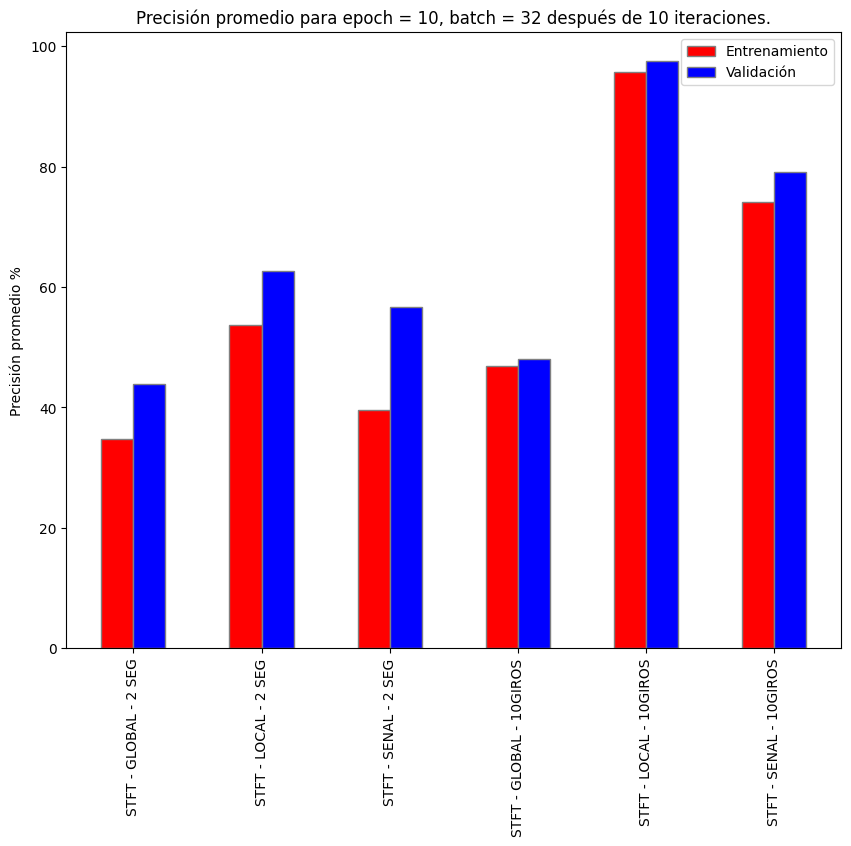

In [33]:
#listas con promedios
acc_promedio = [accuracy_train_1, accuracy_train_2,accuracy_train_3,accuracy_train_4,accuracy_train_5,accuracy_train_6]
val_promedio = [val_train_1, val_train_2, val_train_3, val_train_4, val_train_5, val_train_6]

nombre_modelo = 'bancos_promedio_comparativo'

barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))

br1 = np.arange(len(acc_promedio))
br2 = [x + barWidth for x in br1]

plt.bar(br1, acc_promedio, color ='r', width = barWidth, edgecolor ='grey', label ='Entrenamiento')
plt.bar(br2, val_promedio, color ='b', width = barWidth, edgecolor ='grey', label ='Validación')

plt.title(f'Precisión promedio para epoch = 10, batch = 32 después de 10 iteraciones.')
plt.ylabel('Precisión promedio %')
plt.xticks([r + barWidth/2 for r in range(len(acc_promedio))],
        ['STFT - GLOBAL - 2 SEG', 'STFT - LOCAL - 2 SEG', 'STFT - SENAL - 2 SEG', 
        'STFT - GLOBAL - 10GIROS', 'STFT - LOCAL - 10GIROS', 'STFT - SENAL - 10GIROS'], rotation = 90)
plt.legend()

plt.savefig('resultados-cnn/imagenes/acc_barras/' + nombre_modelo + '_accuracy.png')

plt.show()


In [34]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-cnn/models"
    carpeta_history = "resultados-cnn/history"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

In [36]:
#Mejores modelos
model_1, hist_1 = cargar_modelo_y_historial('GLOBAL-2seg-16384_iter_3')
model_2, hist_2 = cargar_modelo_y_historial('LOCAL-2seg-16384_iter_9')
model_3, hist_3 = cargar_modelo_y_historial('SENAL-2seg-16384_iter_5')
model_4, hist_4 = cargar_modelo_y_historial('GLOBAL-10giros-16384_iter_7')
model_5, hist_5 = cargar_modelo_y_historial('LOCAL-10giros-16384_iter_6')
model_6, hist_6 = cargar_modelo_y_historial('SENAL-10giros-16384_iter_8')

In [37]:
#Función gráfico precision
def grafico_precision_pormodelo(nombre_modelo):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-cnn/history/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(hist_df['accuracy'], label='Accuracy')
    ax.plot(hist_df['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title(nombre_modelo + ' Accuracy')
    ax.legend(loc='lower right')

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-cnn/imagenes/accuracy/' + nombre_modelo + '_accuracy.png')

    # Mostrar gráfico
    plt.show()

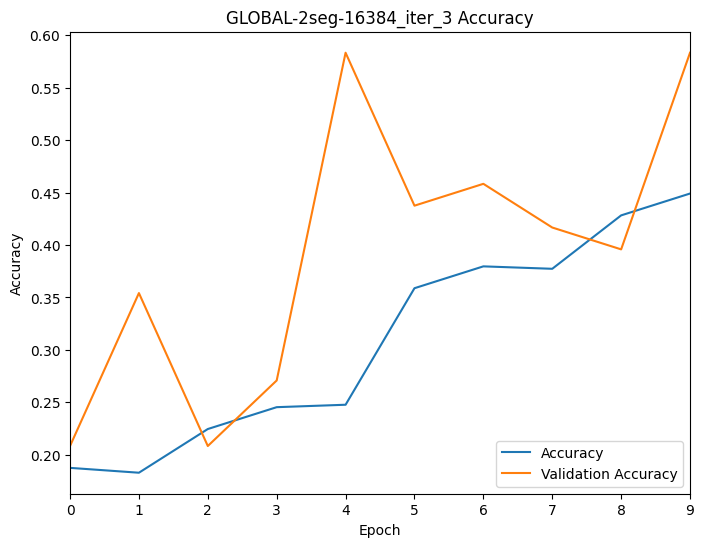

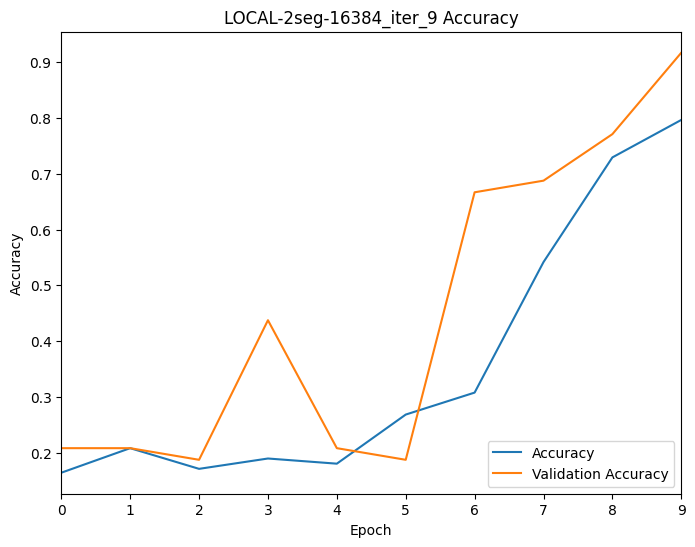

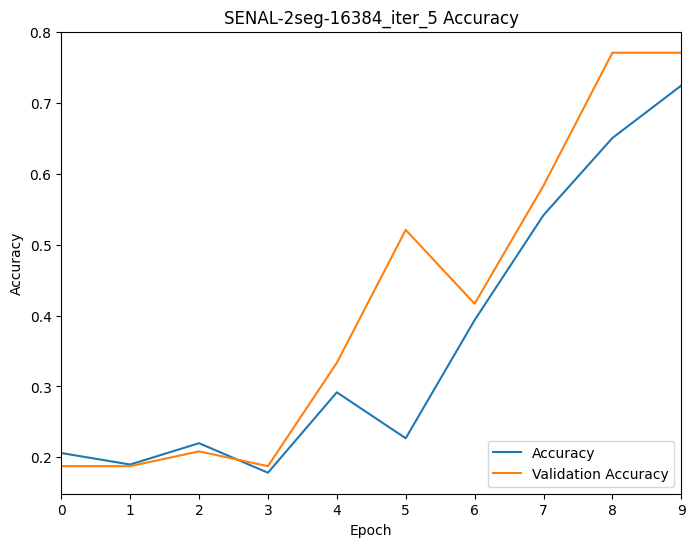

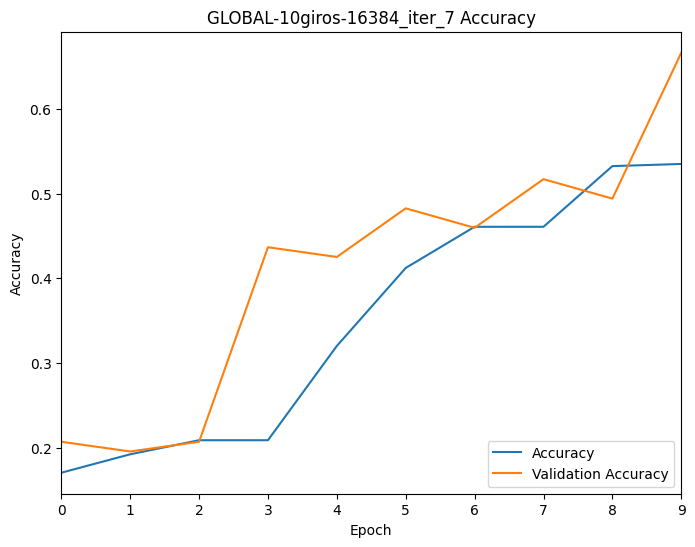

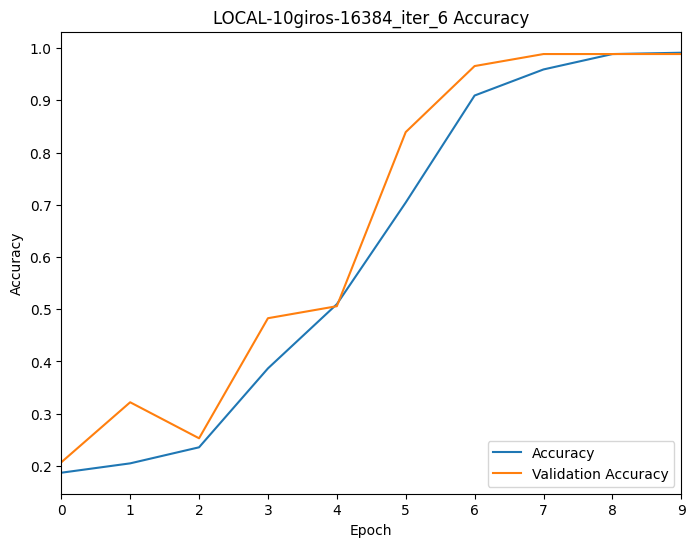

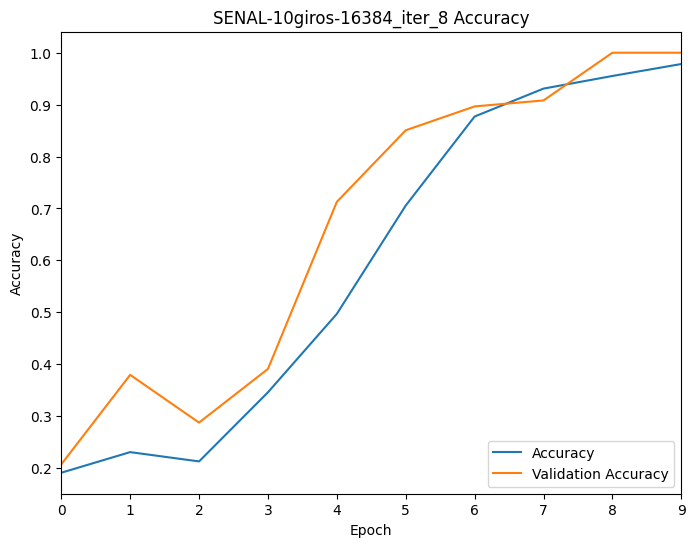

In [38]:
#Plots de accuraccy
grafico_precision_pormodelo('GLOBAL-2seg-16384_iter_3')
grafico_precision_pormodelo('LOCAL-2seg-16384_iter_9')
grafico_precision_pormodelo('SENAL-2seg-16384_iter_5')
grafico_precision_pormodelo('GLOBAL-10giros-16384_iter_7')
grafico_precision_pormodelo('LOCAL-10giros-16384_iter_6')
grafico_precision_pormodelo('SENAL-10giros-16384_iter_8')

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=0.8)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['H', 'I', 'O', 'B', 'C'], yticklabels=['H', 'I', 'O', 'B', 'C'])
    plt.title(name)
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta verdadera')

    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-cnn/imagenes/matriz_confusion/confusion_matrix_{}.png'.format(name))

    plt.show()

4/4 [==============================] - 0s 90ms/step


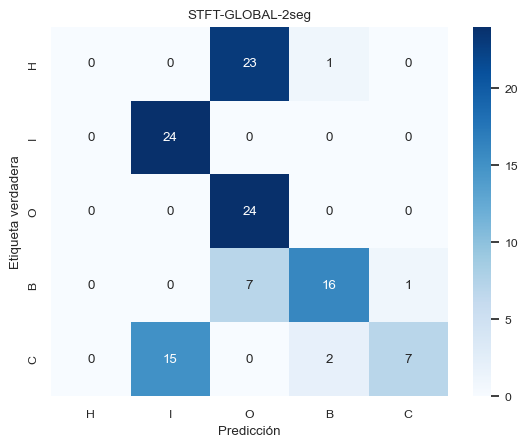

4/4 [==============================] - 0s 5ms/step


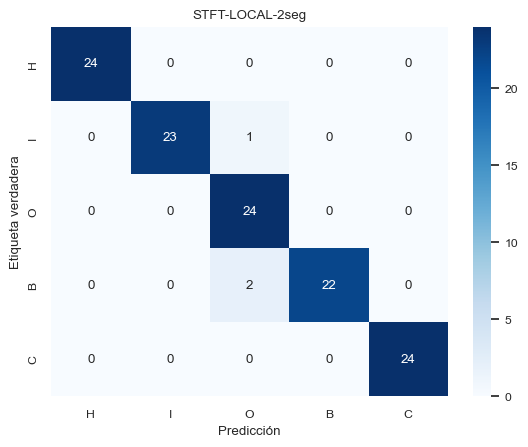

4/4 [==============================] - 0s 5ms/step


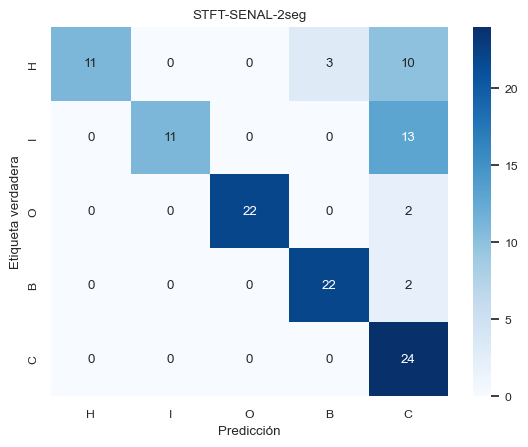

7/7 [==============================] - 0s 22ms/step


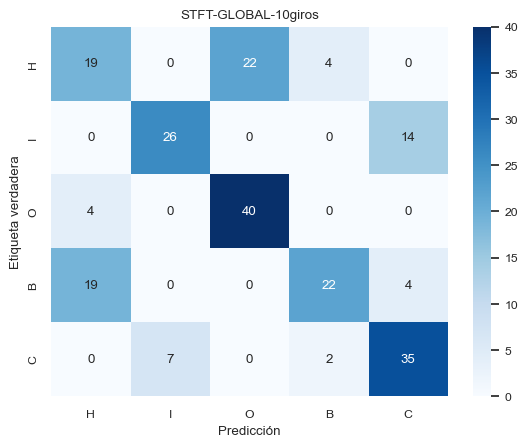

7/7 [==============================] - 0s 5ms/step


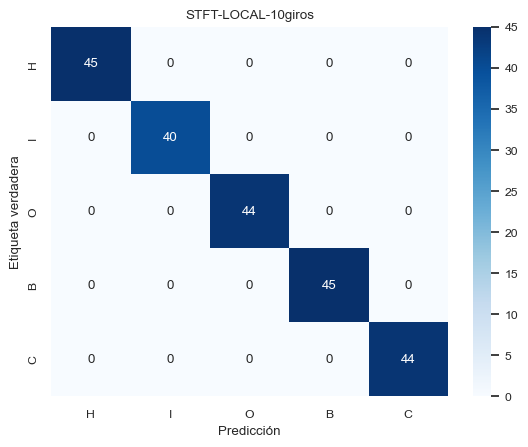

7/7 [==============================] - 0s 5ms/step


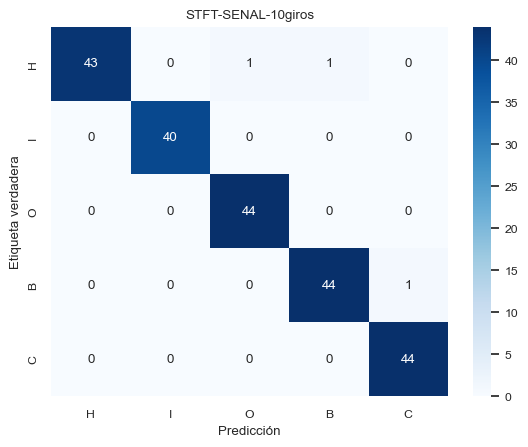

In [42]:
#Plot matriz confusion
plot_matriz_confusion('STFT-GLOBAL-2seg', model_1,x_test_1,y_test_1)
plot_matriz_confusion('STFT-LOCAL-2seg', model_2,x_test_2,y_test_2)
plot_matriz_confusion('STFT-SENAL-2seg', model_3,x_test_3,y_test_3)
plot_matriz_confusion('STFT-GLOBAL-10giros', model_4,x_test_4,y_test_4)
plot_matriz_confusion('STFT-LOCAL-10giros', model_5,x_test_5,y_test_5)
plot_matriz_confusion('STFT-SENAL-10giros', model_6,x_test_6,y_test_6)

### Testeo del modelo

In [43]:
def print_test_scores(name,model,x_test,y_test):
    score = model.evaluate(x_test, y_test)
    print('Modelo: ', name)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return score

In [44]:
#Valores para test
score_1 = print_test_scores('STFT-GLOBAL-2seg', model_1,x_test_1,y_test_1)
score_2 = print_test_scores('STFT-LOCAL-2seg', model_2,x_test_2,y_test_2)
score_3 = print_test_scores('STFT-SENAL-2seg', model_3,x_test_3,y_test_3)
score_4 = print_test_scores('STFT-GLOBAL-10giros', model_4,x_test_4,y_test_4)
score_5 = print_test_scores('STFT-LOCAL-10giros', model_5,x_test_5,y_test_5)
score_6 = print_test_scores('STFT-SENAL-10giros', model_6,x_test_6,y_test_6)

4/4 [==============================] - 0s 89ms/step - loss: 0.3667 - accuracy: 0.5917
Modelo:  STFT-GLOBAL-2seg
Test loss: 0.36673614382743835
Test accuracy: 0.5916666388511658
4/4 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.9750
Modelo:  STFT-LOCAL-2seg
Test loss: 0.2125597894191742
Test accuracy: 0.9750000238418579
4/4 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.7500
Modelo:  STFT-SENAL-2seg
Test loss: 0.2873576283454895
Test accuracy: 0.75
7/7 [==============================] - 0s 6ms/step - loss: 0.3255 - accuracy: 0.6514
Modelo:  STFT-GLOBAL-10giros
Test loss: 0.32550719380378723
Test accuracy: 0.6513761281967163
7/7 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 1.0000
Modelo:  STFT-LOCAL-10giros
Test loss: 0.02122209034860134
Test accuracy: 1.0
7/7 [==============================] - 0s 6ms/step - loss: 0.0453 - accuracy: 0.9862
Modelo:  STFT-SENAL-10giros
Test loss: 0.04527554661035538
Tes

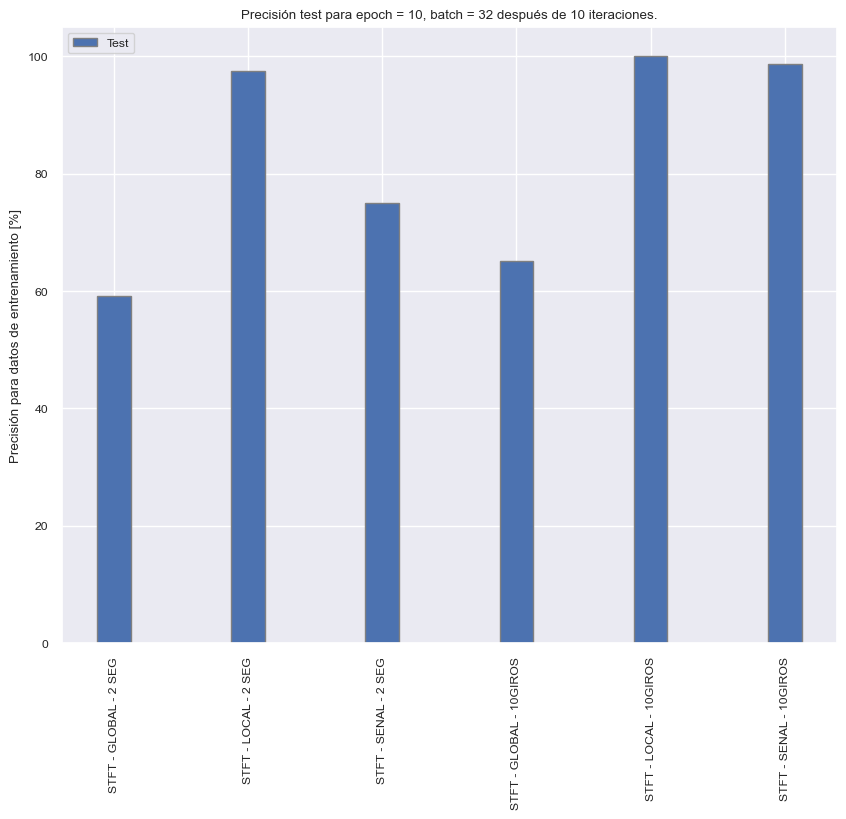

In [45]:
#listas con promedios
acc_test = [score_1[1]*100, score_2[1]*100, score_3[1]*100, score_4[1]*100, score_5[1]*100, score_6[1]*100]

nombre_modelo = 'bancos_test'

fig = plt.subplots(figsize =(10, 8))

br1 = np.arange(len(acc_test))

plt.bar(br1, acc_test, color ='b', width = barWidth, edgecolor ='grey', label ='Test')

plt.title(f'Precisión test para epoch = 10, batch = 32 después de 10 iteraciones.')
plt.ylabel('Precisión para datos de entrenamiento [%]')
plt.xticks([r for r in range(len(acc_test))],
        ['STFT - GLOBAL - 2 SEG', 'STFT - LOCAL - 2 SEG', 'STFT - SENAL - 2 SEG', 
        'STFT - GLOBAL - 10GIROS', 'STFT - LOCAL - 10GIROS', 'STFT - SENAL - 10GIROS'], rotation = 90)
plt.legend(loc = 'upper left')

plt.savefig('resultados-cnn/imagenes/acc_barras/' + nombre_modelo + '_accuracy.png')

plt.show()


# Para resultados 2: Distintos anchos de ventana

In [14]:
#Directorios de bancos de imagenes

mydir_best_1= r"BANCOS/grey/4096/10giros/Banco_GLOBAL_COLOR"
mydir_best_2= r"BANCOS/grey/4096/10giros/Banco_LOCAL_COLOR" 
mydir_best_3= r"BANCOS/grey/4096/10giros/Banco_SENAL_COLOR" 

mydir_best_4= r"BANCOS/grey/8192/10giros/Banco_GLOBAL_COLOR"
mydir_best_5= r"BANCOS/grey/8192/10giros/Banco_LOCAL_COLOR" 
mydir_best_6= r"BANCOS/grey/8192/10giros/Banco_SENAL_COLOR" 

mydir_best_7= r"BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR"
mydir_best_8= r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 
mydir_best_9= r"BANCOS/grey/16384/10giros/Banco_SENAL_COLOR" 

mydir_best_10 = r"BANCOS/grey/32768/10giros/Banco_SENAL_COLOR"
mydir_best_11 = r"BANCOS/grey/32768/10giros/Banco_SENAL_COLOR"
mydir_best_12 = r"BANCOS/grey/32768/10giros/Banco_SENAL_COLOR" 

test_size = 0.2
val_size = 0.1

In [15]:
#Datos
x_train_1, x_test_1, x_val_1, y_train_1, y_test_1, y_val_1 = prepros_bancoimagenes(mydir_best_1, test_size, val_size)
x_train_2, x_test_2, x_val_2, y_train_2, y_test_2, y_val_2 = prepros_bancoimagenes(mydir_best_2, test_size, val_size)
x_train_3, x_test_3, x_val_3, y_train_3, y_test_3, y_val_3 = prepros_bancoimagenes(mydir_best_3, test_size, val_size)

x_train_4, x_test_4, x_val_4, y_train_4, y_test_4, y_val_4 = prepros_bancoimagenes(mydir_best_4, test_size, val_size)
x_train_5, x_test_5, x_val_5, y_train_5, y_test_5, y_val_5 = prepros_bancoimagenes(mydir_best_5, test_size, val_size)
x_train_6, x_test_6, x_val_6, y_train_6, y_test_6, y_val_6 = prepros_bancoimagenes(mydir_best_6, test_size, val_size)

x_train_7, x_test_7, x_val_7, y_train_7, y_test_7, y_val_7 = prepros_bancoimagenes(mydir_best_7, test_size, val_size)
x_train_8, x_test_8, x_val_8, y_train_8, y_test_8, y_val_8 = prepros_bancoimagenes(mydir_best_8, test_size, val_size)
x_train_9, x_test_9, x_val_9, y_train_9, y_test_9, y_val_9 = prepros_bancoimagenes(mydir_best_9, test_size, val_size)

x_train_10, x_test_10, x_val_10, y_train_10, y_test_10, y_val_10 = prepros_bancoimagenes(mydir_best_10, test_size, val_size)
x_train_11, x_test_11, x_val_11, y_train_11, y_test_11, y_val_11 = prepros_bancoimagenes(mydir_best_11, test_size, val_size)
x_train_12, x_test_12, x_val_12, y_train_12, y_test_12, y_val_12 = prepros_bancoimagenes(mydir_best_12, test_size, val_size)

(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)


In [16]:
iteraciones = 10
iterar_cnn(iteraciones, x_train_1, y_train_1, x_val_1, y_val_1, 'r2-4096-GLOBAL', epochs, batch)
iterar_cnn(iteraciones, x_train_2, y_train_2, x_val_2, y_val_2, 'r2-4096-LOCAL', epochs, batch)
iterar_cnn(iteraciones, x_train_3, y_train_3, x_val_3, y_val_3, 'r2-4096-SENAL', epochs, batch)


In [17]:
iterar_cnn(iteraciones, x_train_4, y_train_4, x_val_4, y_val_4, 'r2-8192-GLOBAL', epochs, batch)
iterar_cnn(iteraciones, x_train_5, y_train_5, x_val_5, y_val_5, 'r2-8192-LOCAL', epochs, batch)
iterar_cnn(iteraciones, x_train_6, y_train_6, x_val_6, y_val_6, 'r2-8192-SENAL', epochs, batch)

In [18]:
iterar_cnn(iteraciones, x_train_7, y_train_7, x_val_7, y_val_7, 'r2-16384-GLOBAL', epochs, batch)
iterar_cnn(iteraciones, x_train_8, y_train_8, x_val_8, y_val_8, 'r2-16384-LOCAL', epochs, batch)
iterar_cnn(iteraciones, x_train_9, y_train_9, x_val_9, y_val_9, 'r2-16384-SENAL', epochs, batch)

In [19]:
iterar_cnn(iteraciones, x_train_10, y_train_10, x_val_10, y_val_10, 'r2-32768-GLOBAL', epochs, batch)
iterar_cnn(iteraciones, x_train_11, y_train_11, x_val_11, y_val_11, 'r2-32768-LOCAL', epochs, batch)
iterar_cnn(iteraciones, x_train_12, y_train_12, x_val_12, y_val_12, 'r2-32768-SENAL', epochs, batch)

## Resultados 3 - GridSearch CNN

In [6]:
#Directorios de bancos de imagenes

mydir_best_best= r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 

test_size = 0.2
val_size = 0.1

In [7]:
#Datos
x_train_best, x_test_best, x_val_best, y_train_best, y_test_best, y_val_best = prepros_bancoimagenes(
                                                                                mydir_best_best, test_size, val_size)


(1086, 128, 128)
(1086,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tf.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def crear_modelo(num_conv_layers, filters, kernel_size, pool_size, dense_units, dropout_rate):
    model = Sequential()
    for i in range(num_conv_layers):
        model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(128, 128, 1)))
        model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Crea el modelo para el clasificador de scikit-learn
model = KerasClassifier(build_fn=crear_modelo, epochs=10, batch_size=32, verbose=0)

# Define los hiperparámetros a ajustar
num_conv_layers = [1, 2, 3, 4, 5]
filters = [32, 64, 128]
kernel_size = [(3,3), (5,5)]
pool_size = [(2,2), (3,3)]
dense_units = [256, 512]
dropout_rate = [0.2, 0.4]

# Crea el diccionario de hiperparámetros a ajustar
param_grid = dict(num_conv_layers=num_conv_layers, filters=filters, kernel_size=kernel_size, pool_size=pool_size, 
                  dense_units=dense_units, dropout_rate=dropout_rate)



ModuleNotFoundError: No module named 'tensorflow.scikeras'

In [10]:
# Realiza GridSearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(x_train_best, y_train_best, validation_data=(x_val_best, y_val_best))

# Imprime los resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_model = grid_result.best_estimator_.model
best_model.save(os.path.join('GridSearch', 'best_model.h5'))
pd.DataFrame(grid_result.best_estimator_.history.history).to_csv(os.path.join('GridSearch', 'best_history.csv'))

C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1073 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\Cristian\anaconda3\envs\memoria\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
  

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[6272,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [23]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 512)               1

### Transfer Learning

In [ ]:
#Cargar datos de entrenamiento
test_size_n = 0.2
val_size_n = 0.1
mydir_nuevo = r"BANCOS/NUEVO/banco_stft_best"
x_train_n, x_test_n, x_val_n, y_train_n, y_test_n, y_val_n = prepros_bancoimagenes(mydir_1, test_size_n, val_size_n)

In [ ]:
epochs = 10
batch_size = 32

# Carga el modelo previamente entrenado
modelo_pre_entrenado = tf.keras.models.load_model('resultados-cnn/models/best_model.h5')

# Elimina la última capa del modelo pre-entrenado
modelo_pre_entrenado.layers.pop()

# Congelar capas (que los pesos no cambien.)
for layer in modelo_pre_entrenado.layers:
    layer.trainable = False

modelo_transfer_learning = tf.keras.Sequential([
    modelo_pre_entrenado,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compila el modelo
modelo_transfer_learning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo con los nuevos datos
modelo_transfer_learning.fit(X_nuevos_datos, y_nuevos_datos, epochs, batch_size)

# Evalúa el modelo
loss, accuracy = modelo_transfer_learning.evaluate(X_test_nuevo, y_test_nuevo)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Guarda el modelo entrenado
modelo_transfer_learning.save('resultados-cnn/models/model_transferlearning.h5')

In [ ]:
#Resultados transfer learning
plot_matriz_confusion('STFT-GLOBAL-2seg', modelo_transfer_learning,x_test_n,y_test_n)

In [ ]:
grafico_precision_pormodelo('best_model')

In [ ]:
score_n = print_test_scores('STFT-GLOBAL-2seg', modelo_transfer_learning,x_test_n,y_test_n)